# Employee Performance Score Classification

In [1]:
# Imports
import pandas as pd # Para el procesamiento de datos

import matplotlib.pyplot as plt # Gráficos
import matplotlib

In [2]:
# Leemos el DataSet y los almacenamos en una variable
data = pd.read_csv("DataSet.csv")

## Data Analysis

In [3]:
# Visualizamos los datos
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
# Revisamos las dimensiones del DataSet
print( data.shape[0], ' Filas, ', data.shape[1], ' Columnas ' )

311  Filas,  36  Columnas 


In [5]:
# Miramos que columnas tenemos y cuales nos van a ser utiles
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
# Buscamos al empleado con el mayor salario
data.iloc[ data["Salary"].idxmax() ]

Employee_Name                        King, Janet
EmpID                                      10089
MarriedID                                      1
MaritalStatusID                                1
GenderID                                       0
EmpStatusID                                    1
DeptID                                         2
PerfScoreID                                    3
FromDiversityJobFairID                         0
Salary                                    250000
Termd                                          0
PositionID                                    16
Position                         President & CEO
State                                         MA
Zip                                         1902
DOB                                     09/21/54
Sex                                            F
MaritalDesc                              Married
CitizenDesc                           US Citizen
HispanicLatino                               Yes
RaceDesc            

In [7]:
# Buscamos al empleado con el menor salario
data.iloc[ data["Salary"].idxmin() ]

Employee_Name                           Zima, Colleen
EmpID                                           10271
MarriedID                                           0
MaritalStatusID                                     4
GenderID                                            0
EmpStatusID                                         1
DeptID                                              5
PerfScoreID                                         3
FromDiversityJobFairID                              0
Salary                                          45046
Termd                                               0
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              1730
DOB                                          08/17/78
Sex                                                 F
MaritalDesc                                   Widowed
CitizenDesc                 

In [8]:
# Buscamos al empleado con el mayor número de faltas
data.iloc[ data["Absences"].idxmax() ]

Employee_Name                           Bates, Norman
EmpID                                           10061
MarriedID                                           0
MaritalStatusID                                     0
GenderID                                            1
EmpStatusID                                         4
DeptID                                              5
PerfScoreID                                         3
FromDiversityJobFairID                              0
Salary                                          57834
Termd                                               1
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              2050
DOB                                          10/18/81
Sex                                                M 
MaritalDesc                                    Single
CitizenDesc                 

In [9]:
# Buscamos al empleado con el menor número de faltas
data.iloc[ data["Absences"].idxmin() ]

Employee_Name                     Adinolfi, Wilson  K
EmpID                                           10026
MarriedID                                           0
MaritalStatusID                                     0
GenderID                                            1
EmpStatusID                                         1
DeptID                                              5
PerfScoreID                                         4
FromDiversityJobFairID                              0
Salary                                          62506
Termd                                               0
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              1960
DOB                                          07/10/83
Sex                                                M 
MaritalDesc                                    Single
CitizenDesc                 

In [10]:
# Buscamos al empleado con el mayor número de Retrasos
data.iloc[ data["DaysLateLast30"].idxmax() ]

Employee_Name                      Delarge, Alex
EmpID                                      10306
MarriedID                                      0
MaritalStatusID                                0
GenderID                                       1
EmpStatusID                                    1
DeptID                                         6
PerfScoreID                                    1
FromDiversityJobFairID                         0
Salary                                     61568
Termd                                          0
PositionID                                     3
Position                      Area Sales Manager
State                                         AL
Zip                                        36006
DOB                                     11/02/75
Sex                                           M 
MaritalDesc                               Single
CitizenDesc                           US Citizen
HispanicLatino                                No
RaceDesc            

In [11]:
# Buscamos al empleado con el menor número de Retrasos
data.iloc[ data["DaysLateLast30"].idxmin() ]

Employee_Name                     Adinolfi, Wilson  K
EmpID                                           10026
MarriedID                                           0
MaritalStatusID                                     0
GenderID                                            1
EmpStatusID                                         1
DeptID                                              5
PerfScoreID                                         4
FromDiversityJobFairID                              0
Salary                                          62506
Termd                                               0
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              1960
DOB                                          07/10/83
Sex                                                M 
MaritalDesc                                    Single
CitizenDesc                 

In [12]:
# Queremos conocer las posiciones y el número de esos empleados.
data["Position"].value_counts().sort_values( ascending=False )


Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. Accountant                    2
IT Manager - DB                   2
Sr. DBA                           2
Director of Operations            1
Shared Services Manager           1
Data Analyst                      1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
President & CEO                   1
Enterprise Architect              1
BI Director                       1
Director of Sales           

### Gráficos de barras

* Distribución de sexo

In [14]:
# Veamos las distribución de sexo en nuestros empleados
data["Sex"].value_counts()
# Podemos observar que hay más 176 mujeres y 135 Hombres

F     176
M     135
Name: Sex, dtype: int64

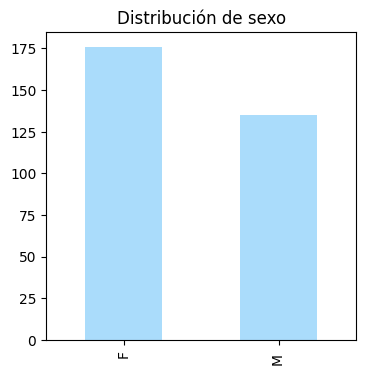

In [74]:
# Graficamos la distribución de Hombres y Mujeres
sexo = data["Sex"].value_counts()
sexo.plot(  kind="bar", 
            title="Distribución de sexo",
            figsize= (4, 4),
            color="#87CEFA",
            alpha=0.70 )
plt.show()

<AxesSubplot:title={'center':'Distribución de empleados por departamento'}>

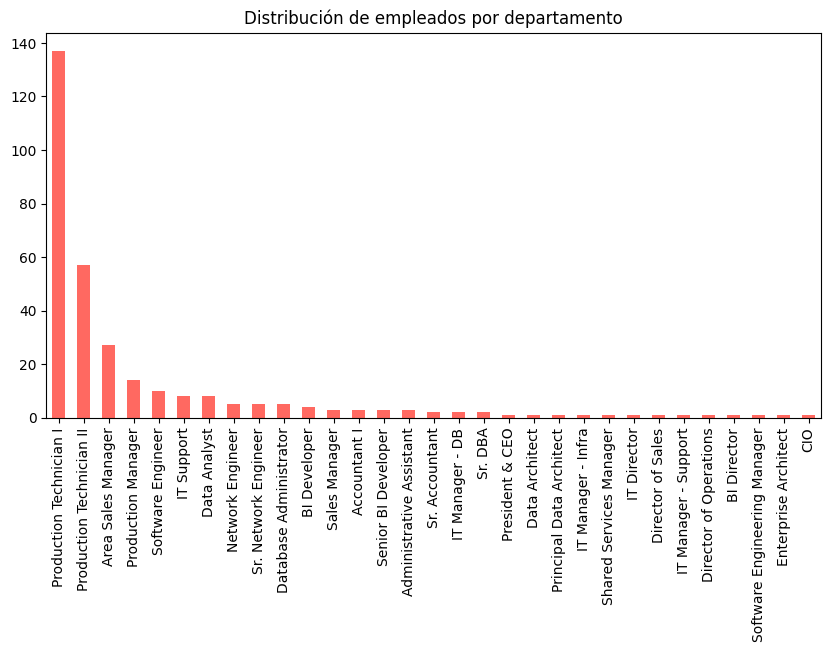

In [141]:
# Graficamos la distribución los empleados por departamento

# Quitamos los valores vacios antes de contar las Posiciones porque sino se  repetiria DataAnalyst
empleadoDepartamento = data["Position"].str.strip().value_counts()
empleadoDepartamento.plot( 
                            kind="bar",
                            title="Distribución de empleados por departamento",
                            figsize=(10, 5),
                            color="#ff6961"
                        )

In [143]:
# Con valores repetidos
(data["Position"].unique())

# Si valores repetidos
#(data["Position"].str.strip().unique())

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

<AxesSubplot:title={'center':'Distribución de Etnias'}>

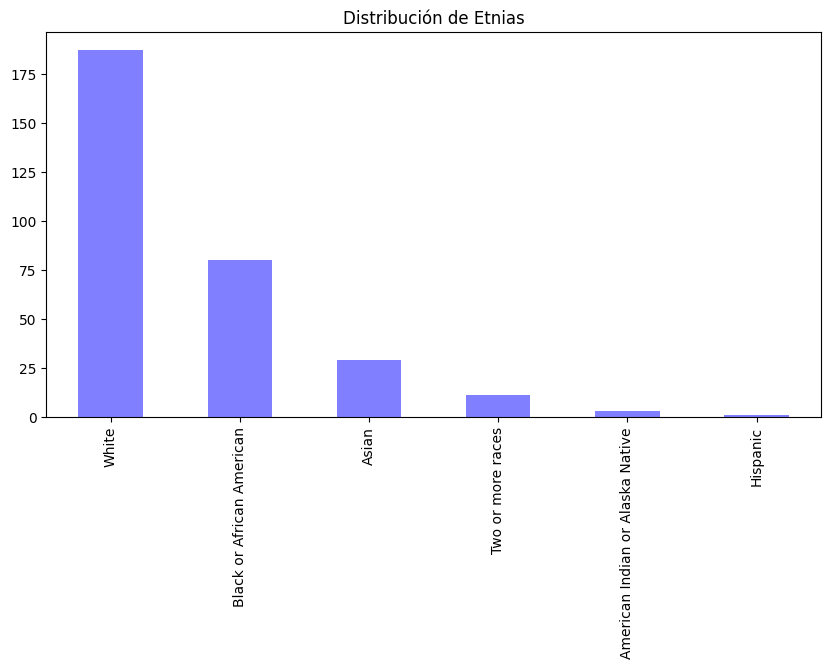

In [184]:
# Gráficamos la distribución de Etnias de los empleados
etnia = data["RaceDesc"].value_counts()
etnia.plot( 
            kind="bar",
            title="Distribución de Etnias",
            figsize=(10, 5),
            color="Blue",
            alpha=0.5
            )

### Gráficos Circulares

In [146]:
# Contemos las fuentes de reclutamiento
data["RecruitmentSource"].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

<AxesSubplot:title={'center':'Fuentes de Reclutamiento'}, ylabel='RecruitmentSource'>

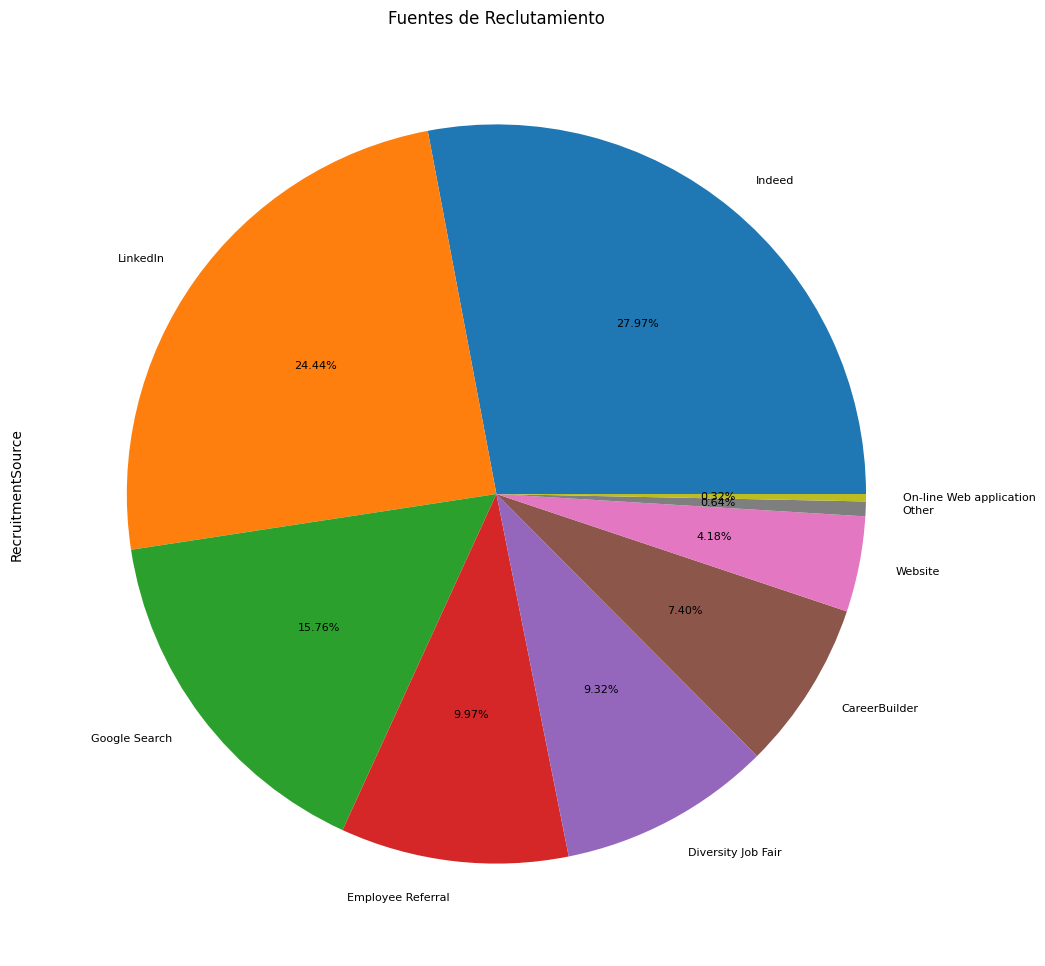

In [201]:
# Graficamos la distribución de las fuentes de reclutamiento

fuentesValores = data["RecruitmentSource"].value_counts()

fuentesValores.plot(
                    kind="pie",
                    title="Fuentes de Reclutamiento",
                    autopct='%1.2f%%', 
                    figsize=(18, 12),
                    fontsize=8
                    )

<AxesSubplot:title={'center':'Evaluación del rendimiento'}, ylabel='PerformanceScore'>

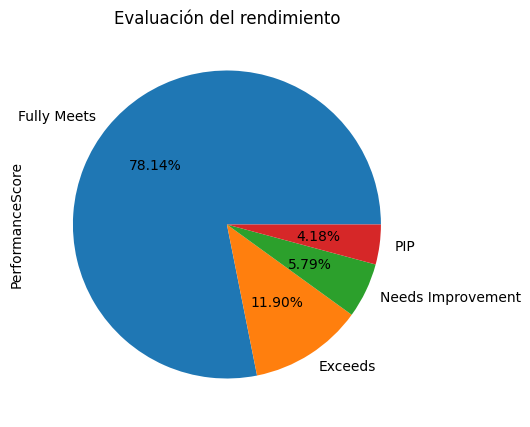

In [200]:
# Graficamos la evaluación del rendimiento
evaRendimiento = data["PerformanceScore"].value_counts()

evaRendimiento.plot( 
                    kind="pie",
                    title="Evaluación del rendimiento",
                    autopct='%1.2f%%', 
                    figsize=(5, 5)
                    )